# Export Data for Deep Learning

In [1]:
import os
import pandas as pd
from pathlib import Path

from arcgis.gis import GIS
from arcgis.features import GeoAccessor
from arcgis.learn import export_training_data
from arcgis.raster.functions import apply 

from config import ent_arcgis

In [2]:
data = Path(os.path.abspath(r'../data'))
data_int = data/'interim'
chip_dir = data_int/'training_data'

chip_dir.mkdir() if not chip_dir.exists() else None

In [3]:
oil_pad_itm_id = 'b0cdda80fee041eca330673ff5df9738'
imagery_itm_id = '797987a4c92142cf985fb6c5c7f0e625'

In [4]:
gis = GIS()
gis

GIS @ https://www.arcgis.com version:7.3

In [5]:
ent_gis = GIS(ent_arcgis.url, username=ent_arcgis.username, password=ent_arcgis.password)
ent_gis

GIS @ https://geoai-webgis-ent.bd.esri.com/portal version:7.1

In [6]:
oil_pad_itm = gis.content.get(oil_pad_itm_id) # Well pads layer
oil_pad_itm

<Item title:"oil_pad_training" type:Feature Layer Collection owner:jmccune_geoai>

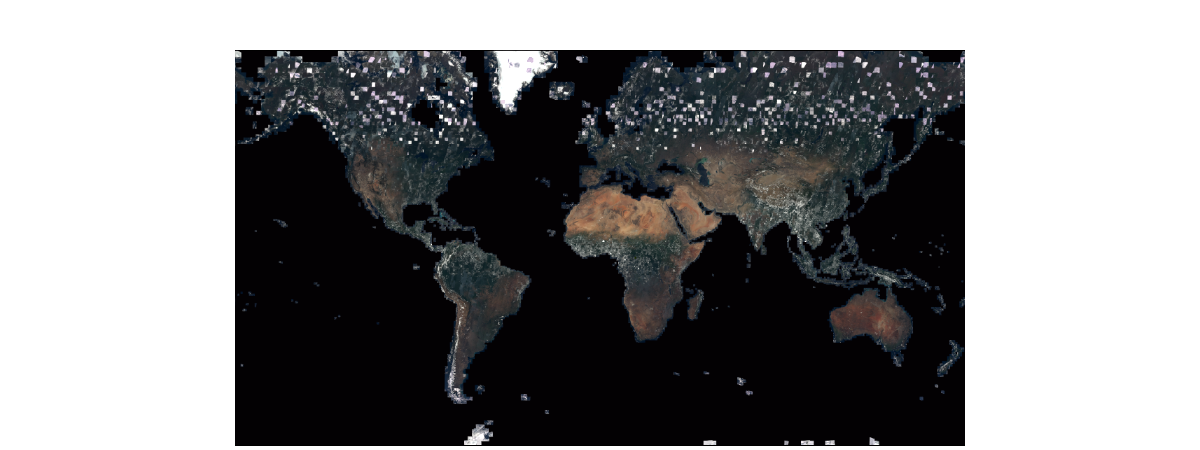

In [7]:
imagery_lyr = gis.content.get(imagery_itm_id).layers[0] # Sentinel-2 layer
imagery_lyr

# Export Training Samples

In [8]:
if 'rasterAnalytics' in ent_gis.properties.helperServices.keys():
    print('Raster Analytics is available, so you will be able to export chips.')
else:
    print('Raster Analytics is not available, so you will not be able to export chips.')

Raster Analytics is available, so you will be able to export chips.


In [12]:
ent_gis.properties.helperServices.rasterAnalytics

{
  "url": "https://geoai-webgis-ra.bd.esri.com/arcgis/rest/services/System/RasterAnalysisTools/GPServer"
}

In [9]:
imagery_data = apply(imagery_lyr, 'Natural Color with DRA', astype='U8')

In [11]:
chips = export_training_data(
    input_raster=imagery_data,
    input_class_data=oil_pad_itm.layers[0],
    chip_format='PNG',
    tile_size={"x":448,"y":448},
    stride_size={"x":224,"y":224},
    metadata_format="PASCAL_VOC_rectangles",
    classvalue_field="classval",
    buffer_radius=75,
    output_location=str(chip_dir),
    gis=ent_gis
)
chips

'D:\\projects\\oil-pad\\data\\interim\\training_data'